# Refolding Colour Map per residue from local HDX-MS analysis

The folded fractions per residue (obtained using PyHDX) were converted to a colour map

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib as mpl

In [2]:
#13 timepoints(min)
time = np.array([30,20,15,10,5,2.5,1,0.667,0.5,0.33,0.167,0.083,0.01]) 

In [3]:
data_table = np.genfromtxt('PpiB_4C_data.txt').T
data_table.shape

(14, 160)

In [4]:
#Put data into an array
data_total = [np.stack([data_table[0], data_table[(i)]]) for i in np.arange(13) + 1]
data_out = []
for d in data_total:
    x, y = d
    
    data_out.append([x, y])

f_data = np.array(data_out)[::-1]
f_data.shape


(13, 2, 160)

### Grid construction

In [5]:
X=f_data[:,0,:].flatten()
X.shape

(2080,)

In [6]:
Z=f_data[:,1,:].flatten()
Z.shape

(2080,)

In [7]:
Y=np.repeat(time,160)
Y.shape

(2080,)

In [8]:
# xi represents the residues of PpiB and yi is the extended timepoints for interpolation
xi = np.arange(2, 163).astype(float)
yi = np.linspace(0, 30, 2000)

In [9]:
#Interpolation of folded fractions over time
triang = tri.Triangulation(X, Y)
interpolator = tri.LinearTriInterpolator(triang, Z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

In [10]:
# Colour desription for the colour map
positions = [0.,0.25,0.5,0.75,1.]
colors = ['#FFFFFF', '#00FFFF', '#008080','#0075EA','#000080']
norm = mpl.colors.Normalize(vmin=positions[0], vmax=positions[-1])

normed_positions = norm(positions)

cmap = mpl.colors.LinearSegmentedColormap.from_list("Driesscolormap", list(zip(normed_positions, colors)))
cmap.set_bad('#3A3A3A')


C:\Users\Gebruiker\Miniconda3\envs\py36_Global\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
C:\Users\Gebruiker\Miniconda3\envs\py36_Global\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  import sys


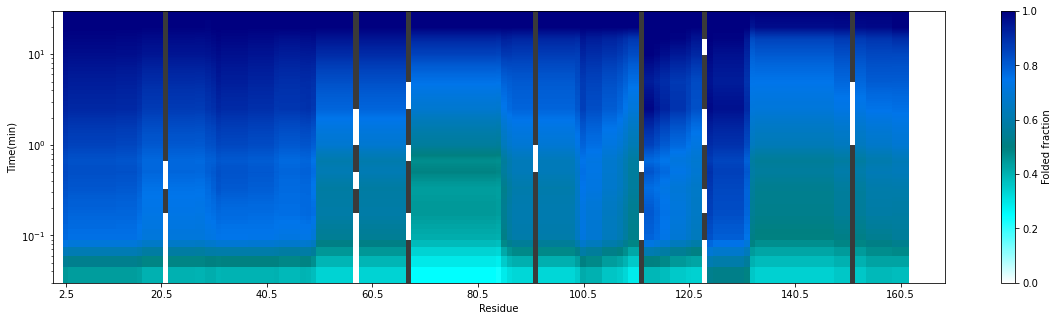

In [11]:
#for prolines and residues without coverage (value of 0), a grey bar is set
values = zi.copy()
values[values == 0.0] = np.nan

#The Colourmap is plotted with a logarithmic time scale
fig,ax=plt.subplots(figsize=(20, 5))
image=ax.pcolormesh(xi, yi, values, cmap=cmap, norm=norm, vmin=0 ,vmax =1)
ax.set_yscale('log')
fig.colorbar(image, label='Folded fraction')
plt.ylim(0.03,30)
plt.xlim(0,169)
ax.set_ylabel('Time(min)')
ax.set_xlabel('Residue')
# residues are set as ticks on the middle ex. residue 2 is a box from 2 to 3 with a tick mark at 2.5
plt.xticks((2.5,20.5,40.5,60.5,80.5,100.5,120.5,140.5,160.5))

plt.savefig('PpiB_scores_4C.png')